In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from data_helper import *

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [5]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel, Matern, RationalQuadratic

In [9]:
kernels = zip((ConstantKernel(), RBF(), WhiteKernel(), Matern(), 
               RationalQuadratic()), ("constant", "rbf", "white", "matern", "rational_quadratic"))


In [13]:
for kernel, name in kernels:
    check_on_dataset(GaussianProcessRegressor, f"gp-{name}", "gp_default_kernels", kernel = kernel, copy_X_train = False)

IntProgress(value=0, max=78)

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\gaussian_process\gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-5170330.52122916,   508720.27416576]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 38, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


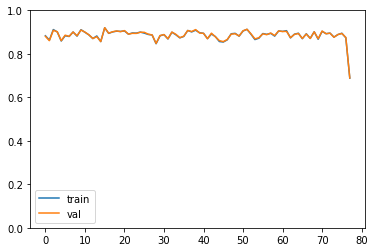

In [66]:
from ipywidgets import IntProgress
from IPython.display import display

X_train = dataset_in["train"]["full"]
y_train = dataset_in["train"]["y"]

n = len(X_train)
batch_size = 500

kernel = RationalQuadratic()
train_scores = []
val_scores = []
f = IntProgress(min=0, max=int(n/batch_size)+1)
display(f)
for i in range(int(n/batch_size)+1):
    test_gp = GaussianProcessRegressor(kernel = kernel, copy_X_train = False)
    test_gp.fit(X_train[i*batch_size: min((i+1)*batch_size, n-1)], y_train[i*batch_size: min((i+1)*batch_size, n-1)])
    train_scores.append(test_gp.score(dataset_in["train"]["full"], dataset_in["train"]["y"]))
    val_scores.append(test_gp.score(dataset_in["val"]["full"], dataset_in["val"]["y"]))
    kernel.set_params(**(test_gp.kernel_.get_params()))
    f.value += 1

plt.plot(range(len(train_scores)), train_scores, label = "train")
plt.plot(range(len(val_scores)), val_scores, label = "val")
plt.ylim(0, 1)
plt.legend()
plt.show()


In [65]:
test_gp.kernel_.get_params()

{'length_scale': 60.14364524196706,
 'length_scale_bounds': (1e-05, 100000.0),
 'nu': 1.5}

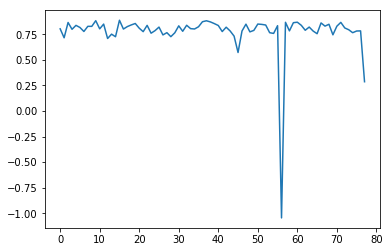

In [50]:
plt.plot(range(len(train_scores)), train_scores, label = "train")

In [52]:
list(zip(train_scores, val_scores))

[(0.8020572403770991, 0.7925419660415569),
 (0.7146492769217616, 0.7011272283971665),
 (0.864073153014584, 0.8607621289514933),
 (0.7975964974879055, 0.7931873085412737),
 (0.8359243259496473, 0.8382965754414019),
 (0.8154318019741279, 0.8194703258959523),
 (0.7762203156991291, 0.7766301674022548),
 (0.8265572043359589, 0.8272582307180181),
 (0.8262324769573735, 0.826147841243969),
 (0.8817313812120073, 0.8767329520590524),
 (0.8020634301866074, 0.7996673577903924),
 (0.8482479742954567, 0.8532685179205486),
 (0.7076558482738105, 0.7054805356456066),
 (0.7500407441935896, 0.7441819091088842),
 (0.7249047366005216, 0.7208371354026846),
 (0.8859912461949532, 0.8858225589623562),
 (0.8000732867768118, 0.7989944850826426),
 (0.8240974109236044, 0.8204322544112639),
 (0.8403900382930786, 0.8383500688407631),
 (0.8543069335944208, 0.8546027084303903),
 (0.8084139555654172, 0.8074516683881793),
 (0.7745852086285312, 0.7673186568958503),
 (0.8360453849792138, 0.8286886457721763),
 (0.759506834